# Test 4: Extra cases

If you can think of alternative ways of measuring the performance of your improved frequency detection system, feel free to write them here, and use them in your project. For instance, the audio file `Zauberflöte_vocal.wav` may serve as a nice little stresstest for your system.

177120


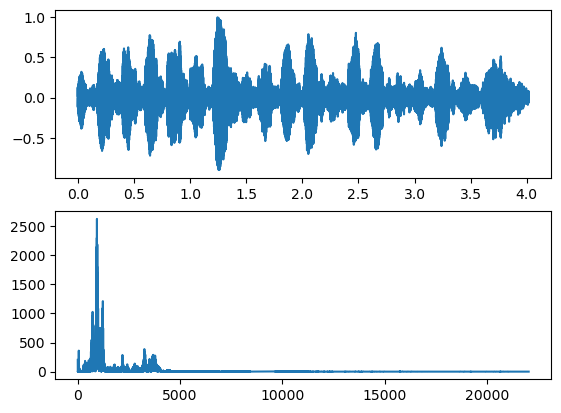

In [2]:
# WRITE YOUR CODE IN THIS CELL:

from baseline_algorithm import freq_detection
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# WRITE YOUR CODE IN THIS CELL:

fs, sampleData = sp.io.wavfile.read("sample_audio/Zauberflöte_vocal.wav") # "fs" is sampling frequency, "sampleData" is the sequence of measurements
# Settings
sampleData = sampleData[10000:-10000]

sampleData = sampleData/max(abs(sampleData))    


N = len(sampleData)
print(N)

# Calculating Noise_Var
SNR = np.logspace(-2,2, num=100)
sig_pwr = np.mean(sampleData**2)
noise_vars = sig_pwr/(SNR)

# Calculating the fundamental frequency
Xm = sp.fft.fft(sampleData).__abs__()[:N//2] 
frequencies = sp.fft.fftfreq(N, 1 / fs)[:N//2] 

first_index = 0
for i in range(len(frequencies)):
    if Xm[i] > 0.3 * 10**8:
        first_index = i
        break
f = round(frequencies[first_index],1)

# Plotting to understand the signals
plt.close('all')
time = np.arange(N)/fs
fig,(ax1,ax2) = plt.subplots(2,1)
ax1.plot(time,sampleData)
ax2.plot(frequencies,Xm)
plt.show()

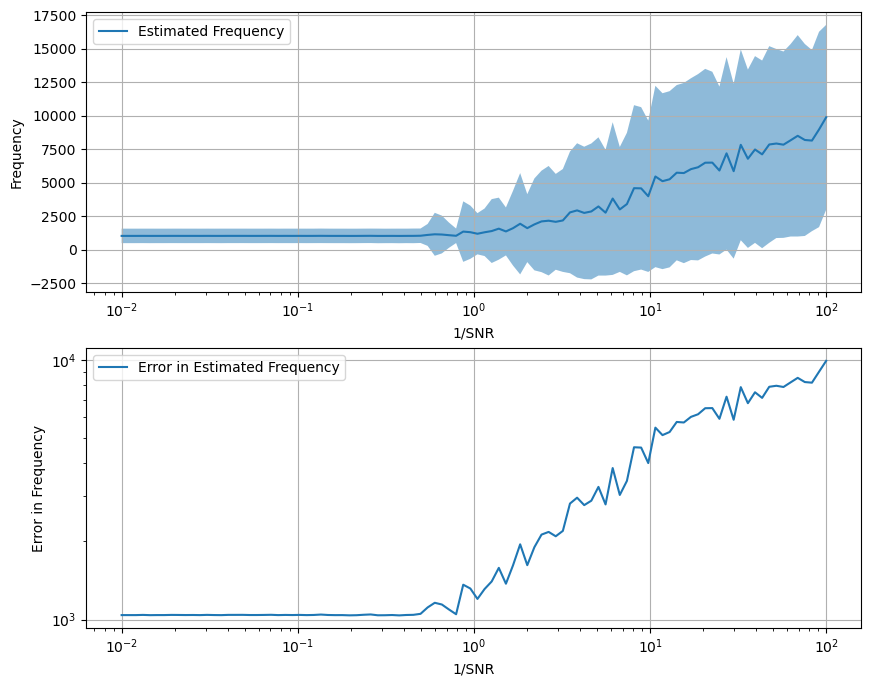

In [3]:
mean_f_est = np.array([])
std_f_est = np.array([])

####
# Why do we generate a new noise for every increase in power,
# instead of just adding together the same noise?
####

for noise_var in noise_vars:
    noise = np.random.normal(scale=np.sqrt(noise_var), size=(N)) 
    x_n = sampleData.copy() + noise.copy()
    t_est, f_est = freq_detection(x_n, fs)

    mean_f_est = np.append(mean_f_est, np.mean(f_est))
    std_f_est = np.append(std_f_est, np.std(f_est))

    
fig,(ax1,ax2) = plt.subplots(2,1, figsize=(10,8))
ax1.set_xscale('log')
ax1.plot(1/SNR, mean_f_est, label="Estimated Frequency")
ax1.fill_between(1/SNR,(mean_f_est+std_f_est),(mean_f_est-std_f_est),alpha=0.5)
ax1.set_ylabel('Frequency')
ax1.set_xlabel('1/SNR')
ax1.grid()
ax1.legend()

ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.plot(1/SNR, np.abs(f-mean_f_est), label="Error in Estimated Frequency")
ax2.set_ylabel('Error in Frequency')
ax2.set_xlabel('1/SNR')
ax2.grid()
ax2.legend()

plt.show()